In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from scipy.optimize import curve_fit
import gdown

# Step 1: Download files from Google Drive
file_ids = {
    'cpu.xlsx': '1RdfxDmTnT6RBpxIwl63_xnT8gII6jdPp',
    'ma_forecast.npy': '1Mh_DCD1KNcut4E2fEzg0-5Mp8QX_hVIt',
    's_curve_params.npy': '1Ohi0e4wNgjNqKVg3ImUTqPTV3JlRGTnx',
    'lstm_model.h5': '1DXN1CqYlyktM8X0gltYKE69zsEDrHvpH'
}

os.makedirs('/content/data', exist_ok=True)
for filename, file_id in file_ids.items():
    # Use wget to download the files directly, bypassing gdown's permission check
    !wget --no-check-certificate "https://drive.google.com/uc?id={file_id}" -O /content/data/{filename}

# Step 2: Load Dataset
file_path = '/content/data/cpu.xlsx'
data = pd.read_excel(file_path)

data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
data = data.asfreq('H')  # Pastikan data per jam
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan forward fill

--2025-02-22 13:53:12--  https://drive.google.com/uc?id=1RdfxDmTnT6RBpxIwl63_xnT8gII6jdPp
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1RdfxDmTnT6RBpxIwl63_xnT8gII6jdPp [following]
--2025-02-22 13:53:12--  https://drive.usercontent.google.com/download?id=1RdfxDmTnT6RBpxIwl63_xnT8gII6jdPp
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120303 (117K) [application/octet-stream]
Saving to: ‘/content/data/cpu.xlsx’

/content/data/cpu.x 100%[===================>] 117.48K  --.-KB/s    in 0.03s   

2025-02-22 13:53:14 (3.58 MB/s) - ‘

<ipython-input-20-826e33928c39>:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')  # Pastikan data per jam
<ipython-input-20-826e33928c39>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan forward fill


# **MOVING AVERAGE**

<ipython-input-22-e5f9a792df1e>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ma_prediction = pd.DataFrame(ma_forecast, index=pd.date_range('2023-12-01', periods=ma_forecast.shape[0], freq='H'))


                             0
2023-12-01 00:00:00  36.875000
2023-12-01 01:00:00  36.666667
2023-12-01 02:00:00  36.833333
2023-12-01 03:00:00  36.791667
2023-12-01 04:00:00  36.750000


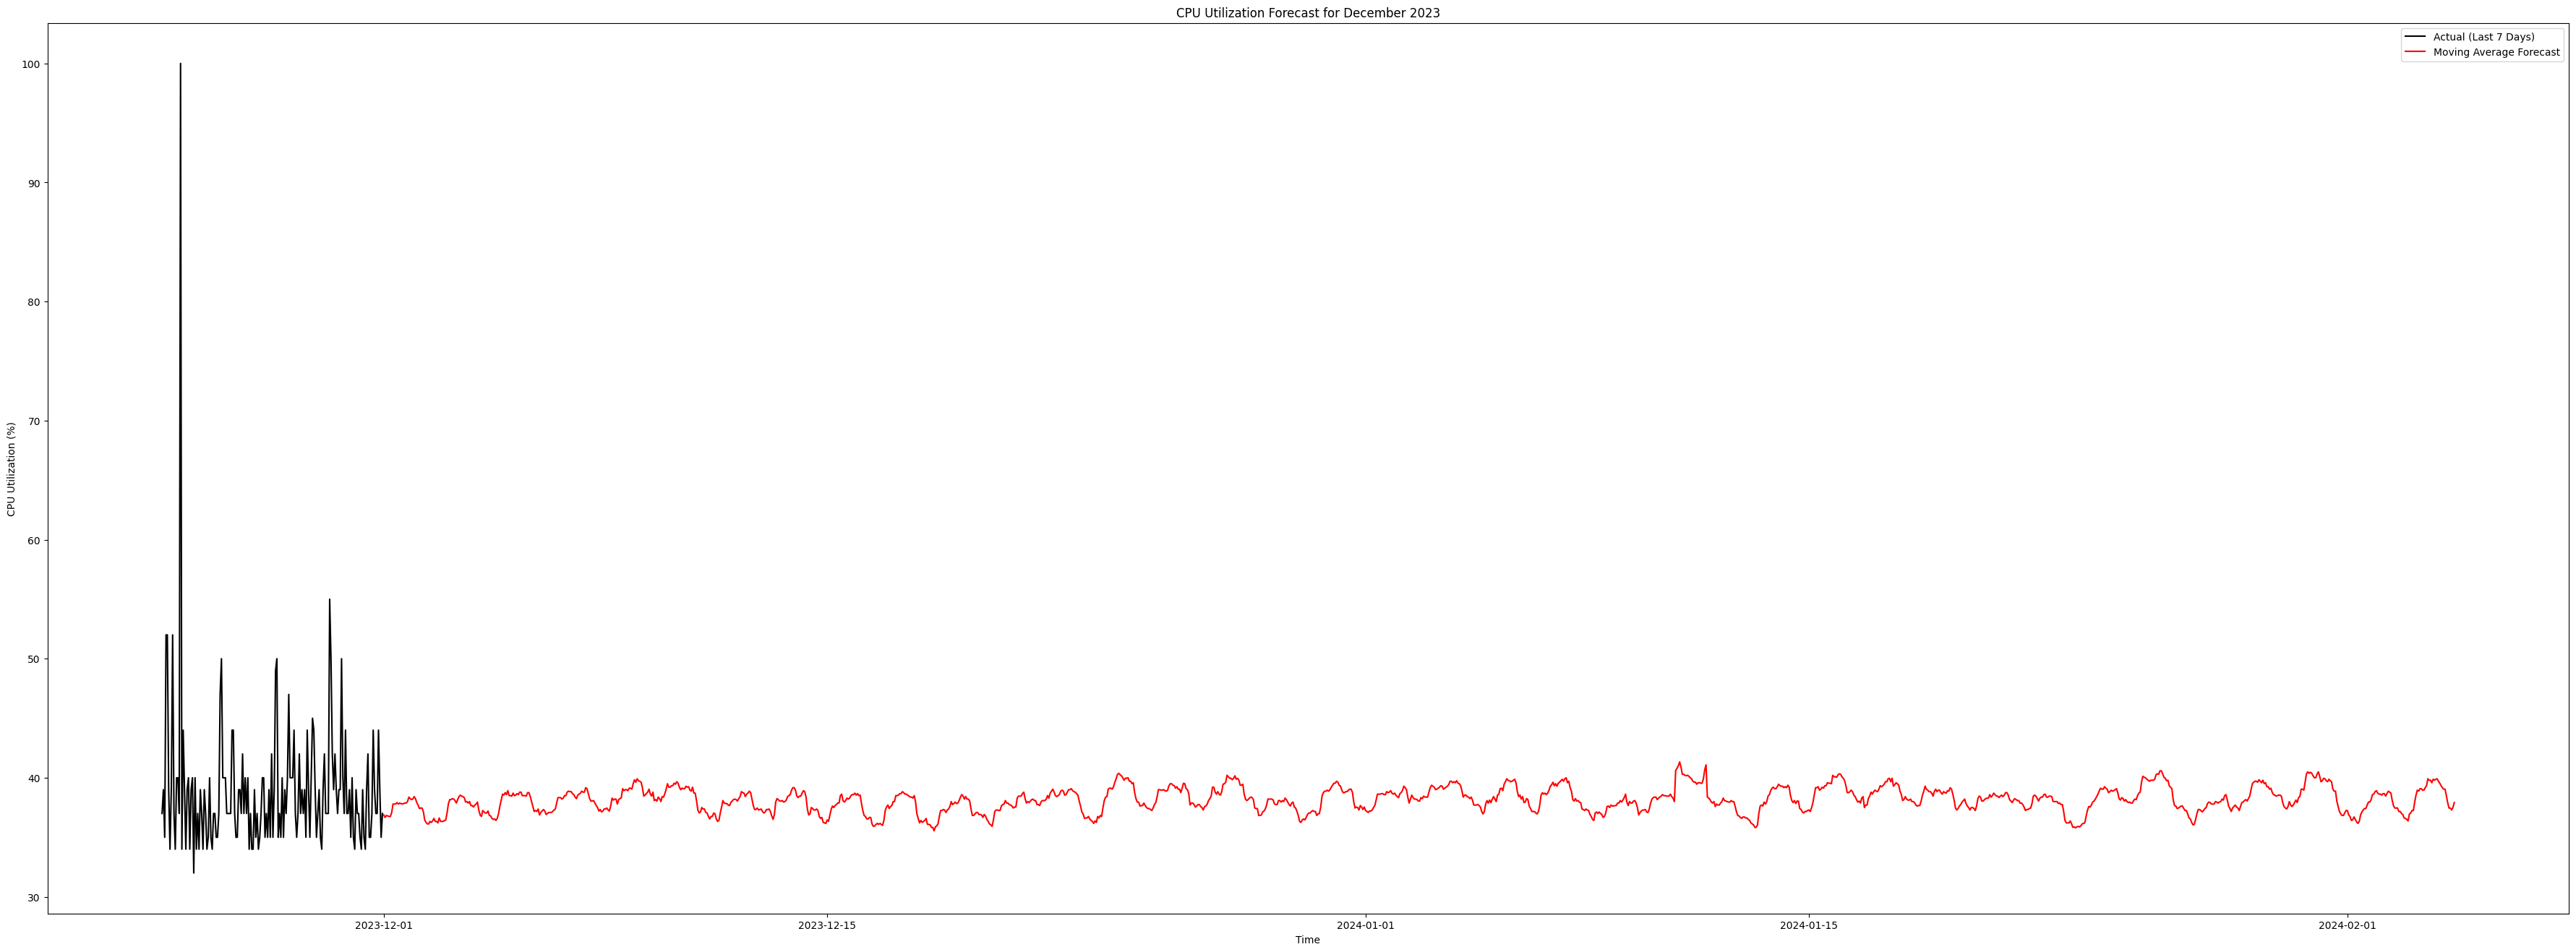

In [22]:
# Forecasting dengan Moving Average
ma_forecast = np.load('/content/data/ma_forecast.npy')
ma_prediction = pd.DataFrame(ma_forecast, index=pd.date_range('2023-12-01', periods=ma_forecast.shape[0], freq='H'))

print(ma_prediction.head())

# Simpan hasil ke Excel
ma_prediction.to_excel("/content/moving_average_forecast.xlsx")

# Visualisasi Hasil Forecasting
plt.figure(figsize=(45, 16))
plt.plot(data.index[-7*24:], data.iloc[:,0].iloc[-7*24:], label='Actual (Last 7 Days)', color='black')
plt.plot(ma_prediction, label='Moving Average Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU Utilization Forecast for December 2023')
plt.legend()
plt.show()

# **LSTM**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━

<ipython-input-24-d5f3ca49c32c>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lstm_df = pd.DataFrame(lstm_predictions, index=pd.date_range('2023-12-01', periods=31*24, freq='H'))


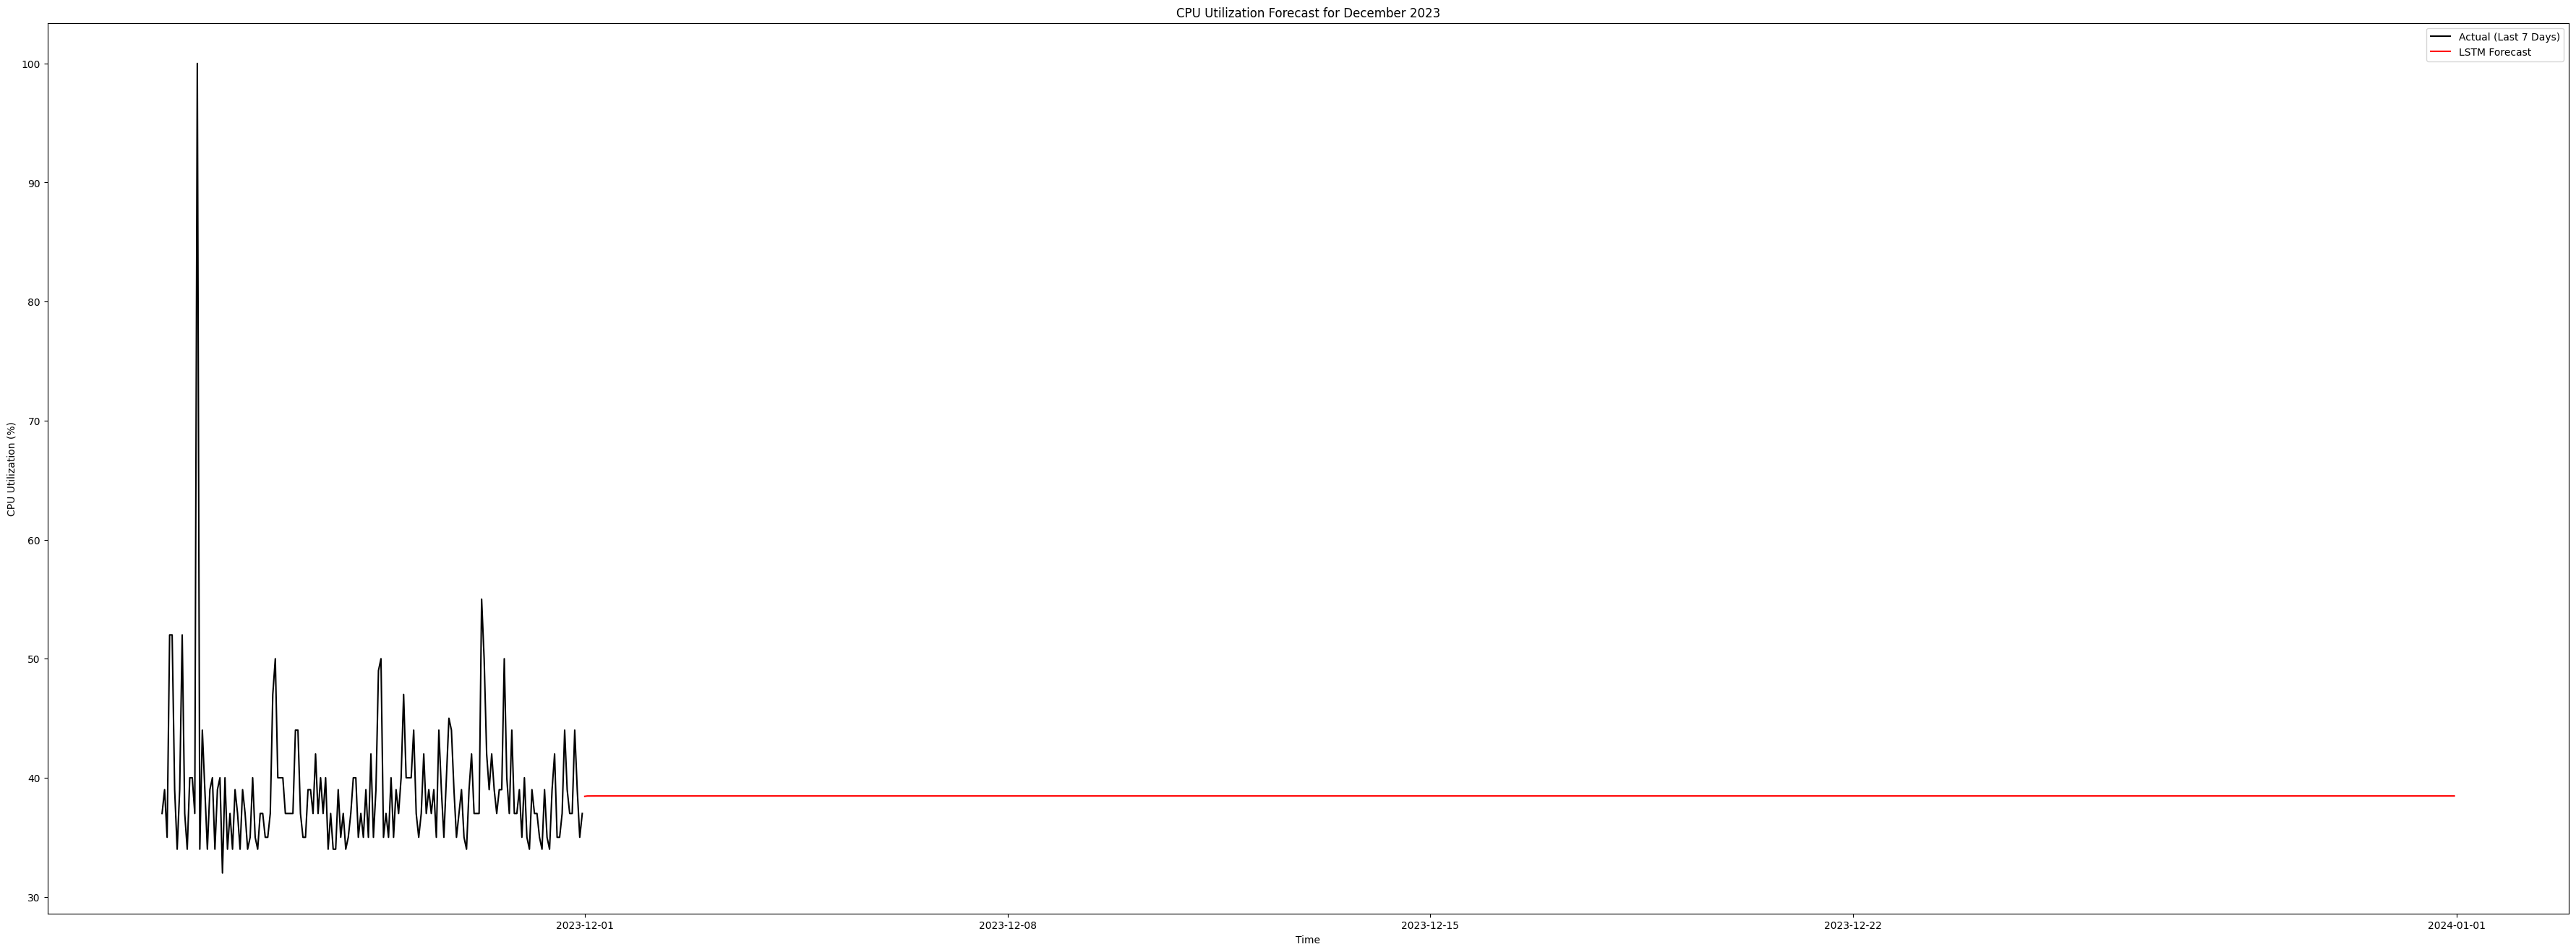

In [24]:
# Forecasting dengan LSTM
lstm_model = load_model('/content/data/lstm_model.h5')

def prepare_lstm_input(data, lookback=24):
    x_input = np.array(data[-lookback:]).reshape(1, lookback, 1)
    return x_input

lstm_predictions = []
data_input = data['cpu utilization percentage'].values.copy() # use correct column name

for _ in range(31 * 24):
    lstm_input = prepare_lstm_input(data_input)
    prediction = lstm_model.predict(lstm_input)[0, 0]
    lstm_predictions.append(prediction)
    data_input = np.append(data_input, prediction)  # Update input data

lstm_df = pd.DataFrame(lstm_predictions, index=pd.date_range('2023-12-01', periods=31*24, freq='H'))

print(lstm_df.head())

# Simpan hasil ke Excel
lstm_df.to_excel("/content/lstm_forecast.xlsx")

# Visualisasi Hasil Forecasting
plt.figure(figsize=(45, 16))
plt.plot(data.index[-7*24:], data.iloc[:,0].iloc[-7*24:], label='Actual (Last 7 Days)', color='black')
plt.plot(lstm_df, label='LSTM Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU Utilization Forecast for December 2023')
plt.legend()
plt.show()

# **S-curved Trend Model**

<ipython-input-30-3ce6d4bbd1ee>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  s_curve_df = pd.DataFrame(s_curve_prediction, index=pd.date_range('2023-12-01', periods=31*24, freq='H'))


                               0
2023-12-01 00:00:00  2174.317877
2023-12-01 01:00:00  2174.317877
2023-12-01 02:00:00  2174.317877
2023-12-01 03:00:00  2174.317877
2023-12-01 04:00:00  2174.317877


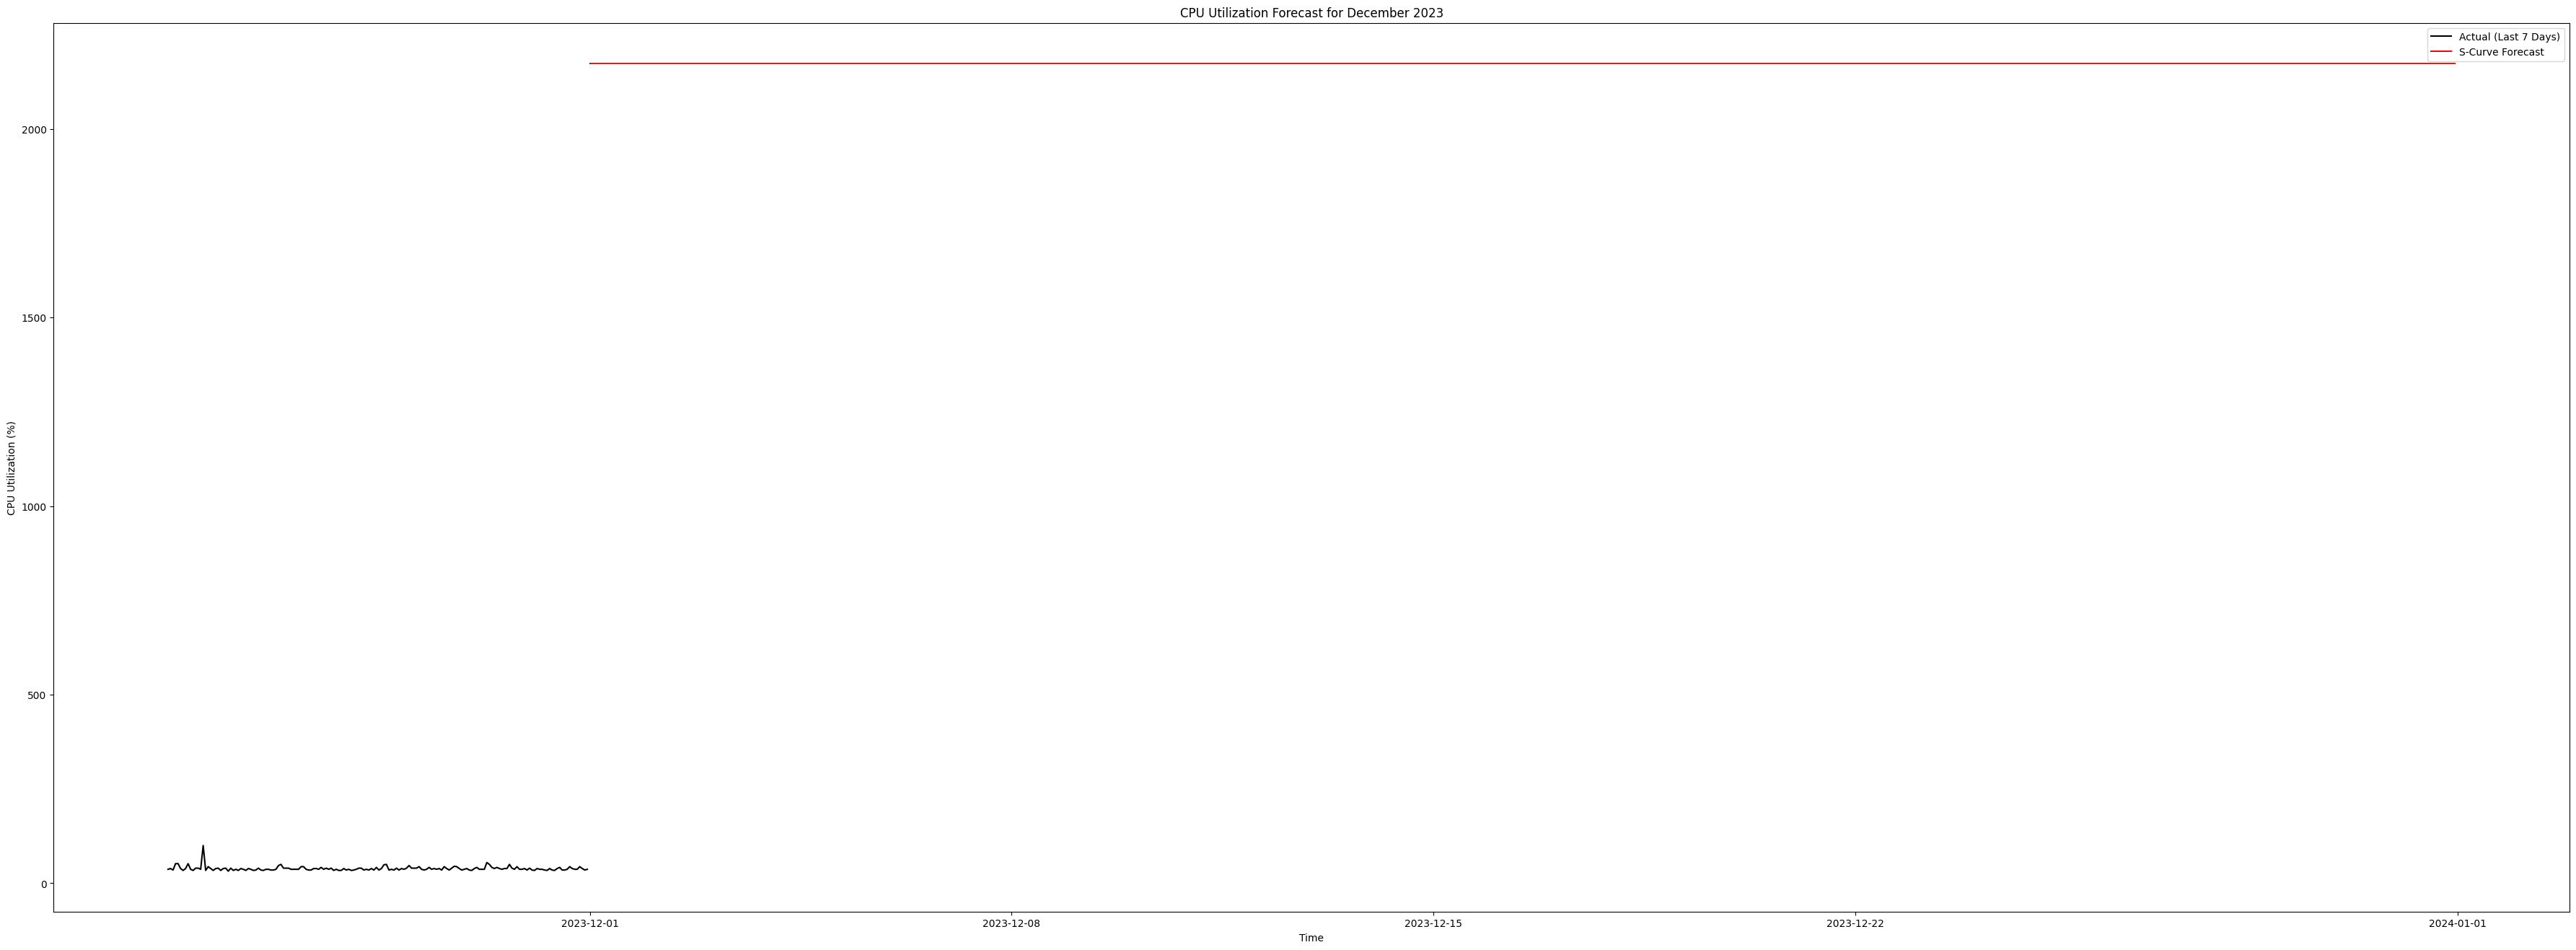

In [30]:
# Forecasting dengan S-Curved Trend Model
def s_curve(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

s_curve_params = np.load('/content/data/s_curve_params.npy')
x_future = np.arange(len(data), len(data) + 31 * 24)
s_curve_prediction = s_curve(x_future, *s_curve_params)
s_curve_df = pd.DataFrame(s_curve_prediction, index=pd.date_range('2023-12-01', periods=31*24, freq='H'))

print(s_curve_df.head())

# Simpan hasil ke Excel
s_curve_df.to_excel("/content/s_curve_forecast.xlsx")

# Visualisasi Hasil Forecasting
plt.figure(figsize=(45, 16))
plt.plot(data.index[-7*24:], data.iloc[:,0].iloc[-7*24:], label='Actual (Last 7 Days)', color='black')
plt.plot(s_curve_df, label='S-Curve Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU Utilization Forecast for December 2023')
plt.legend()
plt.show()